# Домашнее задание 1. Введение в Pytorch и DL. Базовые элементы.

## Задание 1

( 6 баллов) Напишите функцию, которая моделирует один нейрон с сигмоидной активацией и реализует вычисление градиента для обновления весов и смещений нейрона. Функция должна принимать список векторов признаков, ассоциированные бинарные метки класса, начальные веса, начальное смещение, скорость обучения и количество эпох. Функция должна обновлять веса и смещение с помощью градиентного спуска (классической версии) на основе функции потерь NLL и возвращать обновленные веса, смещение и список значений NLL для каждой эпохи, округленное до четырех десятичных знаков.
Проведите обучение на предоставленном наборе данных из задания 4 (для двух разных лет). Опционально сгенерируйте другие подходящие наборы данных. Опишите ваши результаты. Предоставленная функция будет также протестирована во время защиты ДЗ.
Можно использовать только чистый torch (без использования autograd и torch.nn). 
Пример:

```
input: features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]], 
labels = [1, 0, 0], 
initial_weights = [0.1, -0.2], 
initial_bias = 0.0, 
learning_rate = 0.1, 
epochs = 2
        output: 
updated_weights = [..., ...], updated_bias = -..., mse_values = [..., ...]
```

In [40]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [41]:
def sigmoid(z):
    return 1.0 / (1.0 + torch.exp(-z))


In [42]:
def train_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs):
    """
    Обучение одного нейрона с сигмоидной активацией используя градиентный спуск.

    Args:
        features: список векторов признаков (list of lists или torch.Tensor)
        labels: бинарные метки класса (list или torch.Tensor)
        initial_weights: начальные веса (list или torch.Tensor)
        initial_bias: начальное смещение (float или torch.Tensor)
        learning_rate: скорость обучения (float)
        epochs: количество эпох (int)

    Returns:
        updated_weights: обновленные веса (list)
        updated_bias: обновленное смещение (float)
        nll_values: список значений NLL для каждой эпохи (list)
    """
    # Преобразуем входные данные в torch.Tensor
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)
    weights = torch.tensor(initial_weights, dtype=torch.float32)
    bias = torch.tensor(initial_bias, dtype=torch.float32)

    n_samples = X.shape[0]
    nll_values = []

    for epoch in range(epochs):
        # Forward pass: вычисляем предсказания
        # z = X @ weights + bias
        z = torch.matmul(X, weights) + bias
        predictions = sigmoid(z)

        # Вычисляем NLL (Negative Log-Likelihood)
        # NLL = -1/n * sum(y * log(p) + (1-y) * log(1-p))
        epsilon = 1e-15  # для численной стабильности
        predictions_clipped = torch.clamp(predictions, epsilon, 1 - epsilon)
        nll = -torch.mean(y * torch.log(predictions_clipped) + (1 - y) * torch.log(1 - predictions_clipped))
        nll_values.append(round(nll.item(), 4))

        # Backward pass: вычисляем градиенты
        # Градиент NLL по весам: dL/dw = 1/n * X^T @ (predictions - y)
        # Градиент NLL по bias: dL/db = 1/n * sum(predictions - y)
        error = predictions - y
        grad_weights = torch.matmul(X.t(), error) / n_samples
        grad_bias = torch.mean(error)

        # Обновляем веса и смещение
        weights = weights - learning_rate * grad_weights
        bias = bias - learning_rate * grad_bias

    # Возвращаем результаты
    updated_weights = weights.tolist()
    updated_bias = round(bias.item(), 4)

    return updated_weights, updated_bias, nll_values


Вспомогательные функции

In [43]:
def load_and_prepare_data(year1, year2, normalize=True):
    """
    Загружает данные и подготавливает их для бинарной классификации двух лет.

    Args:
        year1: первый год для классификации (метка 0)
        year2: второй год для классификации (метка 1)
        normalize: нормализовать ли признаки (default: True)

    Returns:
        features: матрица признаков
        labels: бинарные метки (0 для year1, 1 для year2)
    """
    # Загружаем данные
    train_x = pd.read_csv('dataset4/train_x.csv', index_col=0)
    train_y = pd.read_csv('dataset4/train_y.csv', index_col=0)

    # Фильтруем данные для выбранных лет
    mask = (train_y['year'] == year1) | (train_y['year'] == year2)
    filtered_x = train_x[mask]
    filtered_y = train_y[mask]

    # Создаем бинарные метки: 0 для year1, 1 для year2
    labels = (filtered_y['year'] == year2).astype(int).values
    features = filtered_x.values

    # Нормализация признаков (стандартизация)
    if normalize:
        mean = features.mean(axis=0)
        std = features.std(axis=0)
        # Избегаем деления на ноль
        std[std == 0] = 1.0
        features = (features - mean) / std

    return features, labels


### ПРИМЕР ИЗ ЗАДАНИЯ

In [44]:
features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 2

updated_weights, updated_bias, nll_values = train_neuron(
	features, labels, initial_weights, initial_bias, learning_rate, epochs
)

print(f"Input:")
print(f"  features = {features}")
print(f"  labels = {labels}")
print(f"  initial_weights = {initial_weights}")
print(f"  initial_bias = {initial_bias}")
print(f"  learning_rate = {learning_rate}")
print(f"  epochs = {epochs}")
print(f"\nOutput:")
print(f"  updated_weights = {updated_weights}")
print(f"  updated_bias = {updated_bias}")
print(f"  nll_values = {nll_values}")


Input:
  features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
  labels = [1, 0, 0]
  initial_weights = [0.1, -0.2]
  initial_bias = 0.0
  learning_rate = 0.1
  epochs = 2

Output:
  updated_weights = [0.10698875039815903, -0.08469319343566895]
  updated_bias = -0.0335
  nll_values = [0.8006, 0.7631]


### ОБУЧЕНИЕ НА ДАТАСЕТЕ: 1989 vs 2001

In [45]:
year1, year2 = 1989, 2001
features, labels = load_and_prepare_data(year1, year2)

print(f"\nДанные загружены:")
print(f"  Год 1: {year1} (метка 0)")
print(f"  Год 2: {year2} (метка 1)")
print(f"  Количество примеров: {len(labels)}")
print(f"  Количество признаков: {features.shape[1]}")
print(f"  Распределение классов: {sum(labels == 0)} примеров класса 0, {sum(labels == 1)} примеров класса 1")

# Инициализация параметров
n_features = features.shape[1]
initial_weights = [0.0] * n_features
initial_bias = 0.0
learning_rate = 0.1
epochs = 100

print(f"\nПараметры обучения:")
print(f"  learning_rate = {learning_rate}")
print(f"  epochs = {epochs}")
print(f"  initial_bias = {initial_bias}")
print(f"  initial_weights = [0.0] * {n_features}")

# Обучение
print("\nОбучение...")
updated_weights, updated_bias, nll_values = train_neuron(
	features, labels, initial_weights, initial_bias, learning_rate, epochs
)

print(f"\nРезультаты обучения:")
print(f"  updated_bias = {updated_bias}")
print(f"  Первые 5 весов: {updated_weights[:5]}")
print(f"  Последние 5 весов: {updated_weights[-5:]}")
print(f"\nЗначения NLL по эпохам:")
print(f"  Эпоха 1: {nll_values[0]}")
print(f"  Эпоха 10: {nll_values[9]}")
print(f"  Эпоха 50: {nll_values[49]}")
print(f"  Эпоха 100: {nll_values[99]}")

# Вычисляем точность на обучающей выборке
X = torch.tensor(features, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.float32)
weights_tensor = torch.tensor(updated_weights, dtype=torch.float32)
bias_tensor = torch.tensor(updated_bias, dtype=torch.float32)

z = torch.matmul(X, weights_tensor) + bias_tensor
predictions = sigmoid(z)
predicted_labels = (predictions >= 0.5).float()
accuracy = (predicted_labels == y).float().mean().item()

print(f"\nТочность на обучающей выборке: {accuracy:.4f} ({accuracy*100:.2f}%)")



Данные загружены:
  Год 1: 1989 (метка 0)
  Год 2: 2001 (метка 1)
  Количество примеров: 765
  Количество признаков: 90
  Распределение классов: 185 примеров класса 0, 580 примеров класса 1

Параметры обучения:
  learning_rate = 0.1
  epochs = 100
  initial_bias = 0.0
  initial_weights = [0.0] * 90

Обучение...

Результаты обучения:
  updated_bias = 1.076
  Первые 5 весов: [0.5887466669082642, -0.3220653533935547, -0.1793137788772583, -0.07741018384695053, -0.1150406002998352]
  Последние 5 весов: [-0.04105584695935249, 0.10001516342163086, -0.09201449900865555, 0.05809762328863144, 0.04818801209330559]

Значения NLL по эпохам:
  Эпоха 1: 0.6931
  Эпоха 10: 0.6121
  Эпоха 50: 0.4793
  Эпоха 100: 0.4309

Точность на обучающей выборке: 0.8118 (81.18%)


### ОБУЧЕНИЕ НА ДАТАСЕТЕ: 1995 vs 2005

In [46]:
year1, year2 = 1995, 2005
features, labels = load_and_prepare_data(year1, year2)

print(f"\nДанные загружены:")
print(f"  Год 1: {year1} (метка 0)")
print(f"  Год 2: {year2} (метка 1)")
print(f"  Количество примеров: {len(labels)}")
print(f"  Количество признаков: {features.shape[1]}")
print(f"  Распределение классов: {sum(labels == 0)} примеров класса 0, {sum(labels == 1)} примеров класса 1")

# Инициализация параметров
n_features = features.shape[1]
initial_weights = [0.0] * n_features
initial_bias = 0.0
learning_rate = 0.1
epochs = 100

print(f"\nПараметры обучения:")
print(f"  learning_rate = {learning_rate}")
print(f"  epochs = {epochs}")

# Обучение
print("\nОбучение...")
updated_weights, updated_bias, nll_values = train_neuron(
	features, labels, initial_weights, initial_bias, learning_rate, epochs
)

print(f"\nРезультаты обучения:")
print(f"  updated_bias = {updated_bias}")
print(f"  Первые 5 весов: {updated_weights[:5]}")
print(f"  Последние 5 весов: {updated_weights[-5:]}")
print(f"\nЗначения NLL по эпохам:")
print(f"  Эпоха 1: {nll_values[0]}")
print(f"  Эпоха 10: {nll_values[9]}")
print(f"  Эпоха 50: {nll_values[49]}")
print(f"  Эпоха 100: {nll_values[99]}")

# Вычисляем точность на обучающей выборке
X = torch.tensor(features, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.float32)
weights_tensor = torch.tensor(updated_weights, dtype=torch.float32)
bias_tensor = torch.tensor(updated_bias, dtype=torch.float32)

z = torch.matmul(X, weights_tensor) + bias_tensor
predictions = sigmoid(z)
predicted_labels = (predictions >= 0.5).float()
accuracy = (predicted_labels == y).float().mean().item()

print(f"\nТочность на обучающей выборке: {accuracy:.4f} ({accuracy*100:.2f}%)")



Данные загружены:
  Год 1: 1995 (метка 0)
  Год 2: 2005 (метка 1)
  Количество примеров: 1369
  Количество признаков: 90
  Распределение классов: 368 примеров класса 0, 1001 примеров класса 1

Параметры обучения:
  learning_rate = 0.1
  epochs = 100

Обучение...

Результаты обучения:
  updated_bias = 0.9421
  Первые 5 весов: [0.42938974499702454, -0.2551533281803131, 0.04401629790663719, -0.0680956318974495, 0.07405507564544678]
  Последние 5 весов: [-0.07498081028461456, 0.05594092234969139, -0.08903458714485168, -0.03422941640019417, 0.057633787393569946]

Значения NLL по эпохам:
  Эпоха 1: 0.6931
  Эпоха 10: 0.6274
  Эпоха 50: 0.5269
  Эпоха 100: 0.4957

Точность на обучающей выборке: 0.7553 (75.53%)


### {*} Реализуйте один из следующих видов градиентного спуска: Stochastic Gradient Descent (SGD), Mini-Batch Gradient Descent. Проведите эксперименты, покажите разницу в сходимости, сходимость в зависимости от формы поверхности. (2 балла)

In [47]:
def train_neuron_sgd(features, labels, initial_weights, initial_bias, learning_rate, epochs, grad_clip=5.0):
    """
    Обучение одного нейрона с сигмоидной активацией используя Stochastic Gradient Descent (SGD).
    Обновление весов происходит после каждого примера.

    Args:
        features: список векторов признаков (list of lists или torch.Tensor)
        labels: бинарные метки класса (list или torch.Tensor)
        initial_weights: начальные веса (list или torch.Tensor)
        initial_bias: начальное смещение (float или torch.Tensor)
        learning_rate: скорость обучения (float)
        epochs: количество эпох (int)
        grad_clip: максимальное значение градиента (для стабильности)

    Returns:
        updated_weights: обновленные веса (list)
        updated_bias: обновленное смещение (float)
        nll_values: список значений NLL для каждой эпохи (list)
    """
    # Преобразуем входные данные в torch.Tensor
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)
    weights = torch.tensor(initial_weights, dtype=torch.float32)
    bias = torch.tensor(initial_bias, dtype=torch.float32)

    n_samples = X.shape[0]
    nll_values = []
    epsilon = 1e-15

    for epoch in range(epochs):
        # Перемешиваем данные в начале каждой эпохи
        indices = torch.randperm(n_samples)

        # Обновляем веса для каждого примера
        for i in indices:
            x_i = X[i]
            y_i = y[i]

            # Forward pass для одного примера
            z = torch.dot(x_i, weights) + bias
            prediction = sigmoid(z)

            # Backward pass для одного примера
            error = prediction - y_i
            grad_weights = x_i * error
            grad_bias = error

            # Gradient clipping для стабильности
            grad_norm = torch.sqrt(torch.sum(grad_weights ** 2) + grad_bias ** 2)
            if grad_norm > grad_clip:
                grad_weights = grad_weights * grad_clip / grad_norm
                grad_bias = grad_bias * grad_clip / grad_norm

            # Обновляем веса и смещение
            weights = weights - learning_rate * grad_weights
            bias = bias - learning_rate * grad_bias

        # Вычисляем NLL на всей выборке после эпохи
        z = torch.matmul(X, weights) + bias
        predictions = sigmoid(z)
        predictions_clipped = torch.clamp(predictions, epsilon, 1 - epsilon)
        nll = -torch.mean(y * torch.log(predictions_clipped) + (1 - y) * torch.log(1 - predictions_clipped))
        nll_values.append(round(nll.item(), 4))

    # Возвращаем результаты
    updated_weights = weights.tolist()
    updated_bias = round(bias.item(), 4)

    return updated_weights, updated_bias, nll_values


def train_neuron_minibatch(features, labels, initial_weights, initial_bias, learning_rate, epochs, batch_size=32):
    """
    Обучение одного нейрона с сигмоидной активацией используя Mini-Batch Gradient Descent.
    Обновление весов происходит после каждого мини-батча.

    Args:
        features: список векторов признаков (list of lists или torch.Tensor)
        labels: бинарные метки класса (list или torch.Tensor)
        initial_weights: начальные веса (list или torch.Tensor)
        initial_bias: начальное смещение (float или torch.Tensor)
        learning_rate: скорость обучения (float)
        epochs: количество эпох (int)
        batch_size: размер мини-батча (int)

    Returns:
        updated_weights: обновленные веса (list)
        updated_bias: обновленное смещение (float)
        nll_values: список значений NLL для каждой эпохи (list)
    """
    # Преобразуем входные данные в torch.Tensor
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)
    weights = torch.tensor(initial_weights, dtype=torch.float32)
    bias = torch.tensor(initial_bias, dtype=torch.float32)

    n_samples = X.shape[0]
    nll_values = []
    epsilon = 1e-15

    for epoch in range(epochs):
        # Перемешиваем данные в начале каждой эпохи
        indices = torch.randperm(n_samples)

        # Обрабатываем данные батчами
        for start_idx in range(0, n_samples, batch_size):
            end_idx = min(start_idx + batch_size, n_samples)
            batch_indices = indices[start_idx:end_idx]

            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            batch_len = len(batch_indices)

            # Forward pass для батча
            z = torch.matmul(X_batch, weights) + bias
            predictions = sigmoid(z)

            # Backward pass для батча
            error = predictions - y_batch
            grad_weights = torch.matmul(X_batch.t(), error) / batch_len
            grad_bias = torch.mean(error)

            # Обновляем веса и смещение
            weights = weights - learning_rate * grad_weights
            bias = bias - learning_rate * grad_bias

        # Вычисляем NLL на всей выборке после эпохи
        z = torch.matmul(X, weights) + bias
        predictions = sigmoid(z)
        predictions_clipped = torch.clamp(predictions, epsilon, 1 - epsilon)
        nll = -torch.mean(y * torch.log(predictions_clipped) + (1 - y) * torch.log(1 - predictions_clipped))
        nll_values.append(round(nll.item(), 4))

    # Возвращаем результаты
    updated_weights = weights.tolist()
    updated_bias = round(bias.item(), 4)

    return updated_weights, updated_bias, nll_values


Вспомогательные функции

In [80]:

def compare_gradient_descent_methods(features, labels, learning_rate=0.1, epochs=100):
    """
    Сравнивает три метода градиентного спуска: Batch GD, SGD, Mini-Batch GD

    Args:
        features: матрица признаков
        labels: бинарные метки
        learning_rate: скорость обучения
        epochs: количество эпох

    Returns:
        results: словарь с результатами для каждого метода
    """
    n_features = features.shape[1]
    initial_weights = [0.0] * n_features
    initial_bias = 0.0

    results = {}

    # Batch Gradient Descent
    print("\n1. Batch Gradient Descent (классический)...")
    weights_bgd, bias_bgd, nll_bgd = train_neuron(
        features, labels, initial_weights, initial_bias, learning_rate, epochs
    )
    results['Batch GD'] = {
        'weights': weights_bgd,
        'bias': bias_bgd,
        'nll_history': nll_bgd,
        'final_nll': nll_bgd[-1]
    }

    # Stochastic Gradient Descent (с меньшим learning rate для стабильности)
    sgd_lr = learning_rate * 0.01  # SGD требует значительно меньший learning rate
    print(f"2. Stochastic Gradient Descent (SGD, lr={sgd_lr})...")
    weights_sgd, bias_sgd, nll_sgd = train_neuron_sgd(
        features, labels, initial_weights, initial_bias, sgd_lr, epochs
    )
    results['SGD'] = {
        'weights': weights_sgd,
        'bias': bias_sgd,
        'nll_history': nll_sgd,
        'final_nll': nll_sgd[-1]
    }

    # Mini-Batch Gradient Descent (batch_size=32)
    print("3. Mini-Batch Gradient Descent (batch_size=32)...")
    weights_mb32, bias_mb32, nll_mb32 = train_neuron_minibatch(
        features, labels, initial_weights, initial_bias, learning_rate, epochs, batch_size=32
    )
    results['Mini-Batch GD (32)'] = {
        'weights': weights_mb32,
        'bias': bias_mb32,
        'nll_history': nll_mb32,
        'final_nll': nll_mb32[-1]
    }

    # Mini-Batch Gradient Descent (batch_size=64)
    print("4. Mini-Batch Gradient Descent (batch_size=64)...")
    weights_mb64, bias_mb64, nll_mb64 = train_neuron_minibatch(
        features, labels, initial_weights, initial_bias, learning_rate, epochs, batch_size=64
    )
    results['Mini-Batch GD (64)'] = {
        'weights': weights_mb64,
        'bias': bias_mb64,
        'nll_history': nll_mb64,
        'final_nll': nll_mb64[-1]
    }

    return results


def plot_comparison(results, title, filename):
    """
    Строит график сравнения методов градиентного спуска
    """
    plt.figure(figsize=(12, 6))

    for method_name, result in results.items():
        epochs = range(1, len(result['nll_history']) + 1)
        # Фильтруем NaN значения для корректного отображения
        nll_values = result['nll_history']
        valid_epochs = []
        valid_nll = []
        for e, nll in zip(epochs, nll_values):
            if not (isinstance(nll, float) and (nll != nll or nll == float('inf') or nll == float('-inf'))):
                valid_epochs.append(e)
                valid_nll.append(nll)

        if valid_nll:
            plt.plot(valid_epochs, valid_nll, marker='o', markersize=3, label=method_name, linewidth=2)

    plt.xlabel('Эпоха', fontsize=12)
    plt.ylabel('NLL (Negative Log-Likelihood)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    print(f"\nГрафик сохранен: {filename}")
    plt.show()


def print_comparison_results(results, features, labels):
    """
    Выводит результаты сравнения методов градиентного спуска
    """
    print("\n" + "=" * 80)
    print("СРАВНЕНИЕ МЕТОДОВ ГРАДИЕНТНОГО СПУСКА")
    print("=" * 80)

    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)

    for method_name, result in results.items():
        print(f"\n{method_name}:")
        print(f"  Финальная NLL: {result['final_nll']}")
        print(f"  NLL на эпохах [1, 10, 50, 100]: {[result['nll_history'][i] for i in [0, 9, 49, 99]]}")

        # Вычисляем точность
        weights_tensor = torch.tensor(result['weights'], dtype=torch.float32)
        bias_tensor = torch.tensor(result['bias'], dtype=torch.float32)
        z = torch.matmul(X, weights_tensor) + bias_tensor
        predictions = sigmoid(z)
        predicted_labels = (predictions >= 0.5).float()
        accuracy = (predicted_labels == y).float().mean().item()
        print(f"  Точность: {accuracy:.4f} ({accuracy*100:.2f}%)")

        # Скорость сходимости (сколько эпох до достижения 90% от финальной NLL)
        target_nll = result['final_nll'] + 0.1 * (result['nll_history'][0] - result['final_nll'])
        epochs_to_converge = next((i for i, nll in enumerate(
            result['nll_history']) if nll <= target_nll), len(result['nll_history']))
        print(f"  Эпох до 90% сходимости: {epochs_to_converge + 1}")


def generate_simple_surface_data(n_samples=200, n_features=5, seed=0):
    """
    Генерация данных для ПРОСТОЙ выпуклой поверхности потерь.
    Использует линейную разделяющую гиперплоскость с небольшим шумом.

    Args:
        n_samples: количество примеров
        n_features: количество признаков
        seed: random seed для воспроизводимости

    Returns:
        features: список векторов признаков
        labels: список бинарных меток
    """
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Создаем истинную разделяющую гиперплоскость
    true_weights = np.random.randn(n_features)
    true_weights = true_weights / np.linalg.norm(true_weights)  # Нормализуем
    true_bias = 0.0

    features = []
    labels = []

    for i in range(n_samples):
        # Генерируем случайную точку в пространстве
        x = np.random.randn(n_features) * 3

        # Вычисляем расстояние до гиперплоскости
        distance = np.dot(true_weights, x) + true_bias

        # Добавляем небольшой шум к расстоянию
        noisy_distance = distance + np.random.randn() * 0.1

        # Определяем класс на основе знака расстояния
        if noisy_distance > 0:
            labels.append(1)
        else:
            labels.append(0)

        features.append(x.tolist())

    return features, labels


def generate_complex_surface_data(n_samples = 200, n_features = 5, seed = 0):
    """
    Генерация данных для СЛОЖНОЙ невыпуклой поверхности потерь.
    Классы перекрываются и имеют нелинейную границу.

    Args:
        n_samples: количество примеров
        n_features: количество признаков
        seed: random seed для воспроизводимости

    Returns:
        features: список векторов признаков
        labels: список бинарных меток
    """
    np.random.seed(seed)
    torch.manual_seed(seed)

    features = []
    labels = []

    for i in range(n_samples):
        x = np.random.randn(n_features) * 2

        # Нелинейная граница: используем квадратичную форму
        # Берем первые 3 признака для создания сложной границы
        decision_value = x[0]**2 + 4*x[1]**2 - x[2]**2 + np.random.randn() * 1.5

        if decision_value > 0:
            labels.append(1)
        else:
            labels.append(0)

        features.append(x.tolist())

    return features, labels


Тестирование методов градиентного спуска на разных поверхностях потерь.

Простая поверхность (гиперплоскость)

Характеристики:
  ✓ Данные генерируются относительно истинной гиперплоскости
  ✓ Класс определяется знаком расстояния до гиперплоскости
  ✓ Добавлен минимальный шум (σ = 0.1)
  ✓ Идеально линейно разделимы
  ✓ Поверхность потерь строго выпуклая и гладкая
  ✓ Глобальный минимум единственный и легко достижим


Датасет: 200 примеров, 10 признаков
Распределение: класс 0 = 94, класс 1 = 106

Обучение методами:
  Batch GD:        Final NLL = 0.6257
  SGD:             Final NLL = 0.0911
  Mini-Batch (20): Final NLL = 0.3628

График сохранен: surface_simple.png


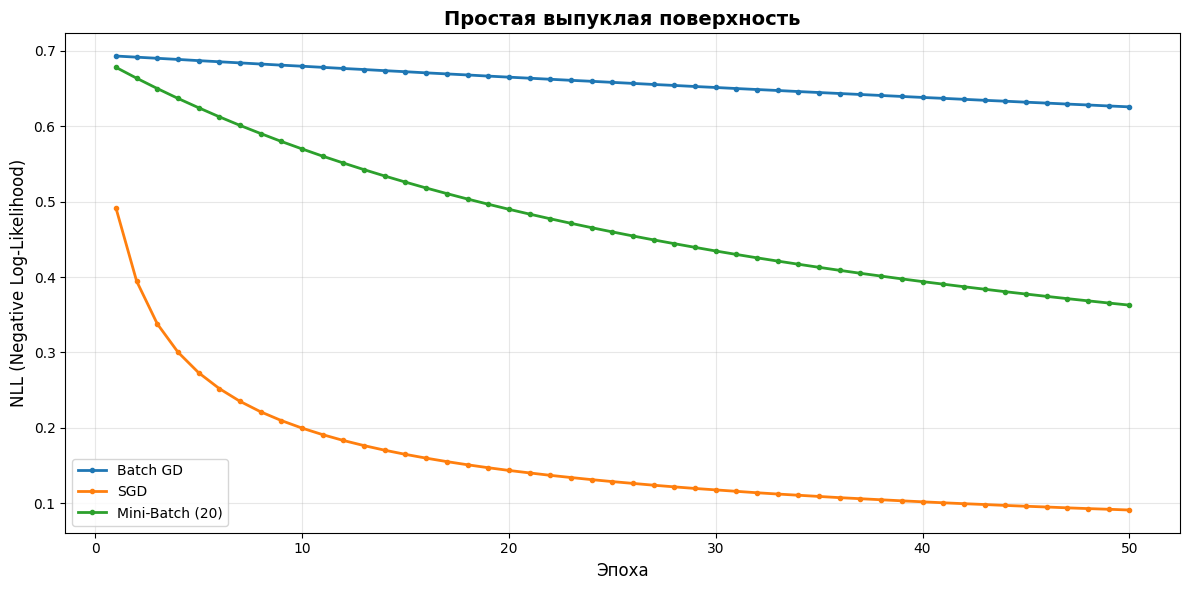

In [81]:
epochs = 50

features1, labels1 = generate_simple_surface_data(n_samples=200, n_features=10, seed=42)
initial_weights = [0.0] * 10
initial_bias = 0.0
learning_rate = 0.001

print(f"\nДатасет: {len(labels1)} примеров, {len(features1[0])} признаков")
print(f"Распределение: класс 0 = {len(labels1) - sum(labels1)}, класс 1 = {sum(labels1)}")

results1 = {}

print("\nОбучение методами:")
w, b, nll = train_neuron(features1, labels1, initial_weights, initial_bias, learning_rate, epochs)
results1['Batch GD'] = nll
print(f"  Batch GD:        Final NLL = {nll[-1]:.4f}")

w, b, nll = train_neuron_sgd(features1, labels1, initial_weights, initial_bias, learning_rate, epochs)
results1['SGD'] = nll
print(f"  SGD:             Final NLL = {nll[-1]:.4f}")

# Для простой поверхности уменьшаем learning rate для Mini-Batch
w, b, nll = train_neuron_minibatch(features1, labels1, initial_weights, initial_bias, learning_rate, epochs, batch_size=20)
results1['Mini-Batch (20)'] = nll
print(f"  Mini-Batch (20): Final NLL = {nll[-1]:.4f}")

# Создаем словарь в правильном формате для plot_comparison
plot_results1 = {name: {'nll_history': nll_hist} for name, nll_hist in results1.items()}
plot_comparison(plot_results1, 'Простая выпуклая поверхность', 'surface_simple.png')


Сложная поверхность (квадратичная форма)

Характеристики:
  ✗ Нелинейная граница (x₀² + x₁² - x₂²)
  ✗ Классы сильно перекрываются (шум σ = 1.5)
  ✗ НЕ линейно разделимы
  ✗ Поверхность потерь невыпуклая с локальными минимумами
  ✗ Линейная модель не может идеально разделить


Датасет: 200 примеров, 10 признаков
Распределение: класс 0 = 39, класс 1 = 161

Обучение методами:
  Batch GD:        Final NLL = 0.6860
  SGD:             Final NLL = 0.4677
  Mini-Batch (20): Final NLL = 0.6353

График сохранен: surface_complex.png


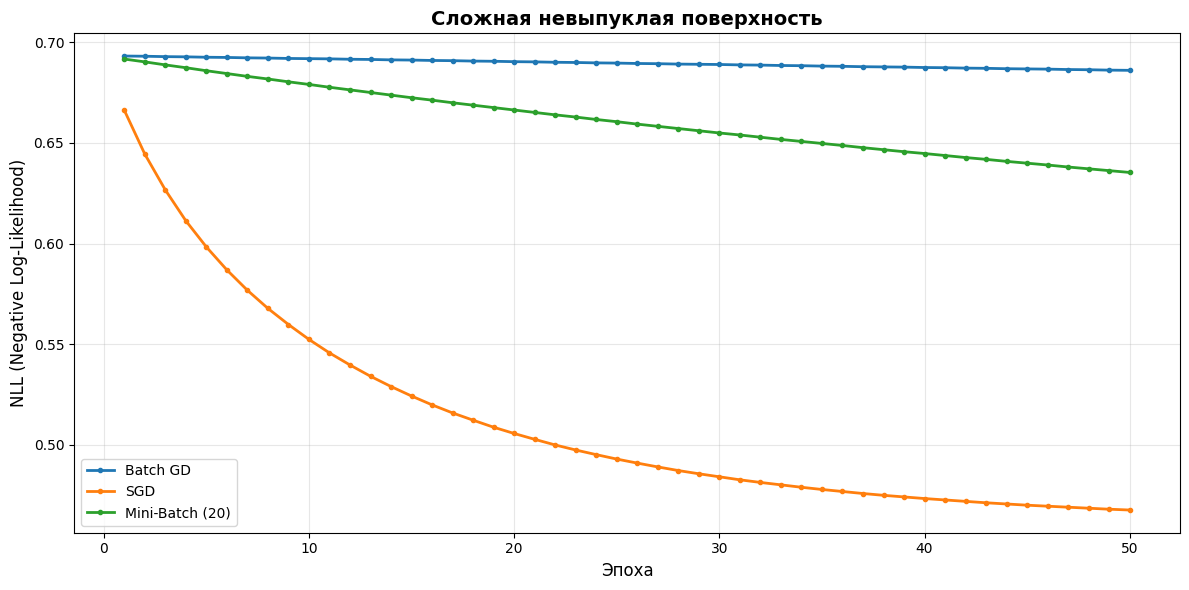

In [82]:
features2, labels2 = generate_complex_surface_data(n_samples=200, n_features=10, seed=123)

print(f"\nДатасет: {len(labels2)} примеров, {len(features2[0])} признаков")
print(f"Распределение: класс 0 = {len(labels2) - sum(labels2)}, класс 1 = {sum(labels2)}")

results2 = {}

print("\nОбучение методами:")
w, b, nll = train_neuron(features2, labels2, initial_weights, initial_bias, learning_rate, epochs)
results2['Batch GD'] = nll
print(f"  Batch GD:        Final NLL = {nll[-1]:.4f}")

w, b, nll = train_neuron_sgd(features2, labels2, initial_weights, initial_bias, learning_rate, epochs)
results2['SGD'] = nll
print(f"  SGD:             Final NLL = {nll[-1]:.4f}")

w, b, nll = train_neuron_minibatch(features2, labels2, initial_weights, initial_bias, learning_rate, epochs, batch_size=20)
results2['Mini-Batch (20)'] = nll
print(f"  Mini-Batch (20): Final NLL = {nll[-1]:.4f}")

# Создаем словарь в правильном формате для plot_comparison
plot_results2 = {name: {'nll_history': nll_hist} for name, nll_hist in results2.items()}
plot_comparison(plot_results2, 'Сложная невыпуклая поверхность', 'surface_complex.png')


Ключевые выводы:
1. SGD

Лучшие результаты при одинаковом lr

Больше шагов оптимизации (обновление после каждого примера)

Требует очень аккуратного подбора lr

2. Batch GD

Стабильная сходимость

Медленный при малом lr

Может застревать в локальных минимумах

3. Mini-Batch GD

Оптимальный баланс

Стабильнее SGD, быстрее Batch GD

Лучший выбор для практики